<a href="https://colab.research.google.com/github/nhosamani/Machine_Learning/blob/main/50_StartUps_KNN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df=pd.read_csv('/content/50_Startups.csv')

In [129]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [130]:
df=df.drop(columns='State',axis=1)

In [131]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [132]:
X=df.iloc[:,0:3].values
X

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [133]:
y=df.iloc[:,3].values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [134]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [135]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.fit(X_test)

In [136]:
from sklearn.neighbors import KNeighborsRegressor
Knn=KNeighborsRegressor(n_neighbors=2)



In [137]:
Knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [138]:
y_pred=Knn.predict(X_test)

In [139]:
y_pred

array([ 88854.285, 117309.575,  67342.53 ,  79513.945,  67342.53 ,
       117309.575, 161589.53 ,  99244.1  , 150985.865, 106568.94 ,
        79513.945, 161589.53 ,  84253.51 ])

In [140]:
Train_Acc=Knn.score(X_train,y_train)

In [141]:
Test_Acc=Knn.score(X_test,y_test)


In [142]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=[]

In [143]:
for k in range(2,20):
  knn=KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_p=knn.predict(X_test)
  
  error=sqrt(mean_squared_error(y_p,y_test))
  rms.append(error)
  print(k,error)


 

2 18807.588786236
3 18001.09191867115
4 19656.487554561263
5 21346.77371728293
6 22516.38671264089
7 23713.889876568544
8 25014.067005548663
9 26725.165299665343
10 28631.798033628344
11 29688.77148108447
12 30013.14171969908
13 29878.52093519868
14 30712.329066913317
15 30787.040468166342
16 31033.13143856042
17 30925.8938117478
18 31537.254073037657
19 32588.81547409941


In [152]:
graph=pd.DataFrame(rms)




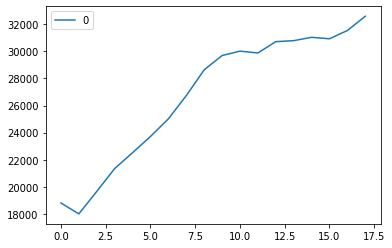

In [154]:
graph.plot()
